In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Building the transition matrix

In [6]:
n = 2**11

def transition_matrix(n):
    A = np.zeros((n,n))

    A[0] = np.concatenate(([0.5, 0.5], [0] * (n-2)))
    A[-1] = np.concatenate(([0] * (n-2), [0.5, 0.5]))
    for i in range(1,n-1):
        A[i] = np.concatenate(([0]*(i-1), [1/3,1/3,1/3], [0]*(n-i-2)))
    return A

A = transition_matrix(n)
print(A)

[[0.5        0.5        0.         ... 0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 ... 0.         0.         0.        ]
 [0.         0.33333333 0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         ... 0.         0.5        0.5       ]]


## Where the magic happens

In [4]:
result = np.linalg.eig(A)
eigenvalues = result[0]
eigenvectors = result[1]

print(eigenvalues)
print(max(eigenvalues))

[ 0.9949831   0.99510758  0.99523051 ... -0.07789194 -0.09457733
 -0.17167823]
1.0000000000000058


## Runtimes

In [16]:
#%timeit -r1 print(np.linalg.eig(A))

| Input size | Runtime |
| --- | --- |
| $n = 2^{11}$ | ~10s |
| $n = 2^{12}$ | ~1min |
| $n = 2^{13}$ | ~7min |
| $n = 2^{14}$ | ~42min |
| $n = 2^{15}$ | breaks down, returns complex results |
| $n \geq 2^{16}$ | instant MemoryError |

## Second largest eigenvalues

In [23]:
second_max = []

for n in range(5, 500):
    A = transition_matrix(n)
    eig = np.linalg.eig(A)[0]
    second_max.append(sorted(eig)[-2])

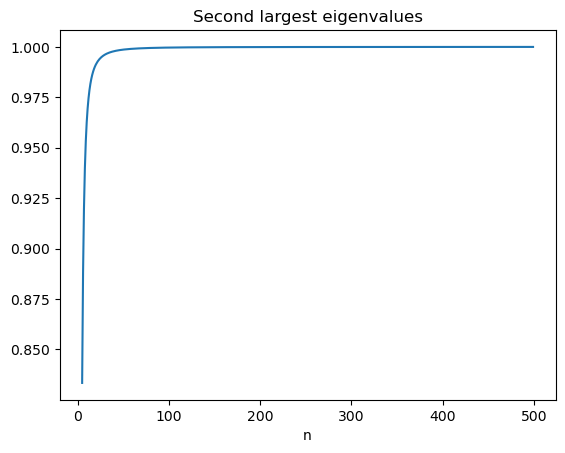

In [41]:
fig, ax = plt.subplots()
ax.plot(range(5, 500), second_max)
ax.set(xlabel='n', title='Second largest eigenvalues')
plt.show()